In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# Install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

Automatically created module for IPython interactive environment


 ## Read the CSV and Perform Basic Data Cleaning   

In [5]:
# Read in csv
df = pd.read_csv("Resources/Autism.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,...,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,...,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,...,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,...,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,...,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [6]:
# Encode strings into binary format
df = pd.get_dummies(df)
pd.set_option('display.max_columns', None)
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,Sex_f,Sex_m,Ethnicity_aboriginal,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_others,Ethnicity_south asians,Ethnicity_white,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes,Residence_Afghanistan,Residence_AmericanSamoa,Residence_Angola,Residence_Antigua and Barbuda,Residence_Argentina,Residence_Armenia,Residence_Aruba,Residence_Australia,Residence_Austria,Residence_Azerbaijan,Residence_Bahamas,Residence_Bahrain,Residence_Bangladesh,Residence_Belgium,Residence_Bolivia,Residence_Brazil,Residence_Burundi,Residence_Canada,Residence_Chile,Residence_China,Residence_Costa Rica,Residence_Croatia,Residence_Cyprus,Residence_Czech Republic,Residence_Denmark,Residence_Djibouti,Residence_Ecuador,Residence_Egypt,Residence_Ethiopia,Residence_Finland,Residence_France,Residence_French Guiana,Residence_Germany,Residence_Honduras,Residence_Hong Kong,Residence_Hungary,Residence_Iceland,Residence_India,Residence_Indonesia,Residence_Iran,"Residence_Iran, Islamic Republic of",Residence_Iraq,Residence_Ireland,Residence_Italy,Residence_Japan,Residence_Jordan,Residence_Kazakhstan,Residence_Lebanon,Residence_Malaysia,Residence_Mexico,Residence_Nepal,Residence_Netherlands,Residence_New Zealand,Residence_Nicaragua,Residence_Niger,Residence_Norway,Residence_Oman,Residence_Pakistan,Residence_Peru,Residence_Philippines,Residence_Poland,Residence_Portugal,Residence_Qatar,Residence_Romania,Residence_Russia,Residence_Saint Kitts and Nevis,Residence_Saudi Arabia,Residence_Serbia,Residence_Sierra Leone,Residence_Singapore,Residence_South Africa,Residence_Spain,Residence_Sri Lanka,Residence_Sweden,Residence_Switzerland,Residence_Taiwan,Residence_Thailand,Residence_Tonga,Residence_Turkey,Residence_Turkmenistan,Residence_Ukraine,Residence_United Arab Emirates,Residence_United Kingdom,Residence_United States,Residence_Uruguay,Residence_Viet Nam,"Residence_Virgin Islands, U.S.",Residence_Zambia,Used_App_Before_no,Used_App_Before_yes,Screening Type_17 and more,Language_arabic,Language_english,Language_farsi,Language_french,Language_mandarin,Language_portuguese,Language_russian,Language_spanish,Language_turkish,Language_urdu,User_friend,User_health care professional,User_others,User_parent,User_relative,User_self,User_teacher,Class_NO,Class_YES
0,6,0,0,0,0,0,0,0,0,0,0,27,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,10,1,1,1,1,1,1,1,1,1,1,21,10,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,12,1,1,0,1,1,0,0,1,0,0,18,5,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,16,1,0,0,0,1,1,1,1,1,1,49,7,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,20,1,1,1,0,0,0,0,1,0,0,18,4,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [51]:
# Set features. Start off with all inputs except 'Case No'
X = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
y = df[['Class_YES']]
print(X.shape, y.shape)
X

(1117, 10) (1117, 1)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1
2,1,1,0,1,1,0,0,1,0,0
3,1,0,0,0,1,1,1,1,1,1
4,1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1113,0,1,1,0,0,0,0,0,0,0
1114,1,1,1,1,1,1,1,1,1,1
1115,1,0,0,0,0,0,1,1,1,1
1116,1,1,0,1,1,1,0,1,0,1


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [54]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

#X
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#y
y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
print(X_train_scaled)
print(y_train_scaled)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 0. 0.]]
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.

In [55]:
n_samples, n_features = X_train_scaled.shape
n_digits = len(np.unique(y_train_scaled))
labels = y_train_scaled
print(X_train_scaled.shape)
print("n_digits:", n_digits)
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))
sample_size = 140

(837, 10)
n_digits: 2
n_digits: 2, 	 n_samples 837, 	 n_features 10


In [56]:
data = X_train_scaled
print(data)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 0. 0.]]


In [57]:
print(data[:, 0].shape)
print(data[:, 1].shape)

(837,)
(837,)


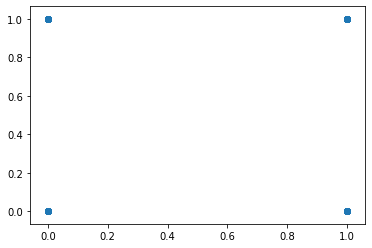

In [58]:
# Plot the data
plt.scatter(data[:, 0], data[:, 1])


In [59]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [60]:
# Fit the model to the data
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
# Predict the clusters
predicted_clusters = kmeans.predict(data)

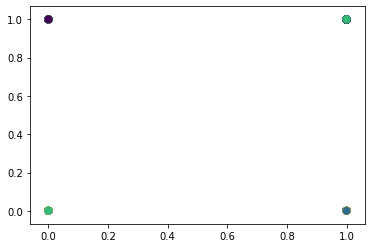

In [62]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')